# Ligningsløsning

__Foreslået ændringer__: 
Sprogligt kan stykkerne med solve/solveset måske lige strammes lidt op.

Og så skal vi lige gentænke, hvordan vi præsenterer den numeriske løsning. Eventuelt kan vi bruge et andet eksempel. Men jeg synes stadig vi skal have det med, selv om Christian ikke er fan, så har vi alligevel brugt det ret meget i kurset. 

# Ligninger

Første trin for at løse ligninger er at få skrevet ligninger op i et sprog, Pyhton kan forstå. Det afgørende er her at indse at et lighedstegn kan have flere fundamentalt forskellige betydninger. Tidligere har vi tildelt variable bestemte værdier ved f.eks. at skrive <code>k = 4</code>, mens vi her vil bruge lighedstegnet til at beskrive et udsagn om sammenhængen mellem to udtryk. I SymPy-sprog er dette en _equality_ og syntaksen er (når vi har importeret SymPy som <code>sp</code> som vi plejer) givet ved <code>sp.Eq(venstre side, højre side)</code>. Pythagoras' læresætning kan f.eks. opskrives som:

In [1]:
import sympy as sp
from sympy.abc import a, b, c             # Vi definerer a, b og c som symbolske variable
sp.init_printing()                        # Aktiver pretty-printing
from IPython.display import display       # Hent vores printer til matematiske udtryk

Pytha = sp.Eq(a ** 2 + b ** 2, c ** 2)    # Syntaks: sp.Eq(venstre side, højre side)
display(Pytha)

Man kan ligeledes danne ligninger ved at sammensætte allerede definerede udtryk, her eksemplificeret ved cosinusrelationen:

In [2]:
from sympy.abc import theta
expr = a**2 + b**2 - 2*a*b*sp.cos(theta) # Vi laver nu blot den ene side af ligningen som et udtryk ("expression")
display(expr)
cos_relation = sp.Eq(c**2, expr)         # Og vi kan nu sammensætte det
display(cos_relation)

Nu når vi har lighederne på plads, er det blevet tid til at lade SymPy regne for os. SymPy giver os to forskellige værktøjer til at løse ligninger, og det er lidt forskelligt, hvad de hver især er gode til. 

## Solveset
Den første metode hedder solveset(), som kan oversættes til "løsningsmængde". Dette er den relativ ny metode, og SymPy-teamet arbejder på at denne skal være den primære løsningsmetode i fremtiden. Den løser dog ikke alle opgaver godt endnu, hvorfor vi nedenfor vil præsentere et alternativ.

Lad os prøve at løse en af overstående ligninger. Lad os tage helt standard Pythagoras $a^2 + b^2 = c^2$ (ligningen defineret som <code>Pytha</code> ovenfor). Hvis vi nu  kender $c=5$ og $a=3$ og ønsker at finde $b$, indsætter vi først værdierne i ligningen:

In [3]:
display(Pytha)
Pytha_indsat = Pytha.subs([(a, 3), (c, 5)])
display(Pytha_indsat)

Vi benytter nu solveset() til at løse denne. For en ligning virker denne funktion ved, at man angiver ligningen og den variabel, som man ønsker at løse for:

In [4]:
solution = sp.solveset(Pytha_indsat, b)
display(solution)

Vi har altså nu fundet løsningerne til ligningen. I tilfældet med Pythagoras' sætning leder vi efter en sidelængde, så vores løsning skal være et positivt tal. Vi kan indskrænke løsningsdomænet ved at give <code>solveset</code> et "domain"-keyword. Dette skal være et såkaldt _SymPy-set_, som er en lidt indviklet størrelse, men i langt de fleste tilfælde kan man slippe afsted med at bede om reelle tal ved at skrive <code>sp.Reals</code> eller ved at give et interval med <code>sp.Interval(_fra_, _til_)</code>, hvor man kan bruge <code>oo</code> for uendelig (forudsat at <code>oo</code> er blevet importeret). For mere avancerede løsningsdomæner henvises til dokumentationen [her](https://docs.sympy.org/latest/modules/sets.html). I dette tilfælde angiver vi et interval:

In [5]:
from sympy import oo, pi, I           # Vi importerer uendelig, pi og den imaginære konstant I 
pos_solution = sp.solveset(Pytha_indsat, b, sp.Interval(0, oo))
display(pos_solution)

<code>solveset</code> virker også hvis vi istedet for en ligning angiver et udtryk (altså uden lighedstegn). Da sætter SymPy udtrykket lig med 0 og løser den derved fremkomne ligning (i dette eksempel $b^2-16 = 0$):

In [6]:
pos_solution = sp.solveset(b**2 - 16, b, sp.Interval(0, oo))
display(pos_solution)

Vi vil bruge den samme syntaks her, hvor vi vil finde rødder i et fjerdegrads polynomium. 

In [7]:
from sympy.abc import x
expr = x ** 4 - 1
solutions = sp.solveset(expr, x) #Da vi har angivet et udtryk, sætter SymPy udtrykket lig med 0 og løser.
display(solutions)

Er vi kun interesserede i reelle løsninger, kan vi indskrænke domænet til de reelle tal:

In [8]:
solutions_real = sp.solveset(expr, x, sp.Reals)
display(solutions_real)

Solveset virker også, hvis vi ikke har en numerisk værdi for alle symboler, men ønsker den generelle løsning. Hvis vi f.eks. vil finde $b$ i cosinusrelationen som defineret tidligere, kan vi skrive følgende:

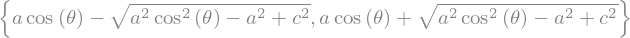

In [9]:
display(cos_relation)
sol_b = sp.solveset(cos_relation, b)
display(sol_b)

Solveset() giver os løsninger skrevet op i mængdenotation for at give os de generelle fuldstændige løsninger. Selvom dette kan være meget fint i nogle tilfælde, ender vi dog i andre tilfælde med en generel og ganske ubrugelig løsning. Dette sker eksempelvis, hvis vi prøver at løse for $\theta$ direkte:

In [10]:
sp.solveset(cos_relation, theta)

Hvilket jo er rigtig nok (sammenlign med selve cosinusrelationen!), men ikke fortæller os så meget, vi ikke vidste i forvejen. Det leder os videre til den anden metode til ligningsløsning:

## Solve
<code>Solve()</code> er den ældre funktion, som på trods af at være mindre generel oftest giver os en brugbar løsning. Syntaksen for input til <code>Solve()</code> er den samme som for <code>Solveset()</code>

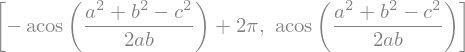

In [11]:
sp.solve(cos_relation, theta)

men man kan dog ikke angive et domæne. I stedet kan man angive en liste af ligheder (eller uligheder), som afgrænser den variable. Hvis vi vil bestemme sidelængen $b$ ved hjælp af Pythagoras' sætning, vil opgaven i solve-sprog lyde:

In [12]:
display(Pytha_indsat)
sol_b = sp.solve([Pytha_indsat, b >= 0], b)
display(sol_b)

Overordnet set er <code>solve</code> rigtig god til at give én løsning. Det kan altså ofte bruges i sammenhænge, hvor man vil tjekke et resultat, eller hvis man blot skal bruge en vilkårlig løsning og ikke den fuldstændige løsning.
Eksempel: Vi løser $\sin(\theta) = 1$:

In [13]:
sp.solve(sp.Eq(sp.sin(theta), 1), theta)

Her får vi altså en løsning, og det vil ofte være den løsning, vi leder efter. Men da $\sin(x)$ er periodisk, ved vi, at der er flere løsninger. Så svaret er ikke fuldkomment. 

I modsætning hertil har <code>solveset</code> den fordel, at den giver et  matematisk stringent svar, og den vil altså returnere hele løsningen:

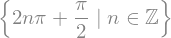

In [14]:
sp.solveset(sp.Eq(sp.sin(theta), 1), theta)

# Numerisk løsning
Nogle gange kan vi komme ud for en situation, hvor en opgave ikke har en brugbar eksakt, symbolsk løsning, eller at hverken <code>solve</code> eller <code>solveset</code> giver et svar, vi kan bruge. Vi kan så benytte <code>sp.nsolve</code> til numerisk løsning af ligninger. Vi bruger således SymPy (som er designet til at være et symbolsk værktøj) til et formål, der er på kanten af dets anvendelsesområde, og vi skal derfor bruge værktøjet med forsigtighed. Det er derfor en god idé i disse tilfælde at tegne grafer for at illustrere opgaven. Derved kan vi checke at svaret rent faktisk giver mening i forhold til opgaven, og det tillader os også at give et ret godt gæt på en løsning.

Derefter indskriver man den numeriske løsning som:  
<code>sp.nsolve(ligning, variabel, startgæt)</code> , og dette vil nu prøve at udregne en numerisk værdi for en løsning. 

Hvis nu vi eksempelvis vil finde en løsning til $x\log(x) = \sin(x)$, starter vi med at lave et plot (se den anden Notebook til uge 3 for en mere grundig forklaring af syntaksen).

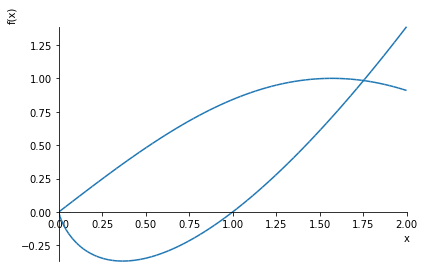

In [18]:
from sympy.abc import x
from sympy.plotting import plot

figur = plot(x * sp.log(x), sp.sin(x), (x, 0, 2))

Heraf ser vi altså, at et godt start gæt ville være omkring $x=1.7$. Dette vil vi nu bruge.

In [19]:
lign = sp.Eq(x * sp.log(x), sp.sin(x))
display(lign)
sp.nsolve(lign, x, 1.75)

Havde vi gættet anderledes eksempelvis $x = - 1$ havde vi også fået et andet resultat, da nsolve forsøger at finde en løsning uden at bekymre sig om hvorvidt løsningen er korrekt. Her er eksempel:

In [17]:
sp.nsolve(lign, x, - 1)

som er et tal tæt på 0. De to grafer er rigtigt nok tæt på hinanden for meget små værdier af $x$, og på grafen kan det se ud som om at de to grafer krydser i $x = 0$. Da $x\log(x)$ slet ikke er defineret for $x=0$, beregner vi (som vi så det i notebook 2)  grænseværdien:

In [24]:
display(sp.limit(x * sp.log(x), x, 0, '+'))   # Beregn og vis grænseværdien af udtrykket for x gående mod 0 oppefra ...

hvilket bekræfter at den med <code>nsolve</code> fundne løsning ikke er helt tosset, selvom den ikke er rigtig. 
Dette er et eksempel på SymPys begrænsninger til numeriske udregninger. 